In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.ndimage import filters
import os
os.sys.path.append('../')

import SimilarityMatrixAnalysis as sm
import utilities as u
import preprocessing as pp


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
mouse = '4139219.3'
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]

df = df.sort_values(['MouseName','DateTime','SessionNumber'])

df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat,s2pfolder
624,4139219.3,08_10_2018,3,TwoTower_noTimeout,63,1,CA1,2018-10-08,G:\My Drive\\VR_Data\TwoTower\4139219.3\08_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\08_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\08_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\08_10_2...
627,4139219.3,08_10_2018,5,TwoTower_noTimeout,55,1,CA1,2018-10-08,G:\My Drive\\VR_Data\TwoTower\4139219.3\08_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\08_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\08_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\08_10_2...
654,4139219.3,10_10_2018,2,TwoTower_noTimeout,100,1,CA1,2018-10-10,G:\My Drive\\VR_Data\TwoTower\4139219.3\10_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\10_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\10_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\10_10_2...
695,4139219.3,12_10_2018,2,TwoTower_Timeout,54,1,CA1,2018-10-12,G:\My Drive\\VR_Data\TwoTower\4139219.3\12_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\12_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\12_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\12_10_2...
741,4139219.3,15_10_2018,2,TwoTower_Timeout,46,1,CA1,2018-10-15,G:\My Drive\\VR_Data\TwoTower\4139219.3\15_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\15_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\15_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\15_10_2...
784,4139219.3,17_10_2018,2,TwoTower_Timeout,38,1,CA1,2018-10-17,G:\My Drive\\VR_Data\TwoTower\4139219.3\17_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\17_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\17_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\17_10_2...
823,4139219.3,19_10_2018,2,TwoTower_Timeout,51,1,CA1,2018-10-19,G:\My Drive\\VR_Data\TwoTower\4139219.3\19_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\19_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\19_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\19_10_2...
838,4139219.3,20_10_2018,1,TwoTower_Timeout,51,1,CA1,2018-10-20,G:\My Drive\\VR_Data\TwoTower\4139219.3\20_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\20_10_2...
839,4139219.3,20_10_2018,2,TwoTower_Timeout,53,1,CA1,2018-10-20,G:\My Drive\\VR_Data\TwoTower\4139219.3\20_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\20_10_2...
856,4139219.3,22_10_2018,1,TwoTower_Timeout,49,1,CA1,2018-10-22,G:\My Drive\\VR_Data\TwoTower\4139219.3\22_10_...,G:\My Drive\2P_Data\TwoTower\4139219.3\22_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\22_10_2...,G:\My Drive\2P_Data\TwoTower\4139219.3\22_10_2...


In [19]:
sess = df_mouse.iloc[-2]

num aberrant ttls 0.0


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:270: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


(411, 90) (90, 411)
(411, 180) (90, 411)
(411, 270) (90, 411)
(411, 360) (90, 411)


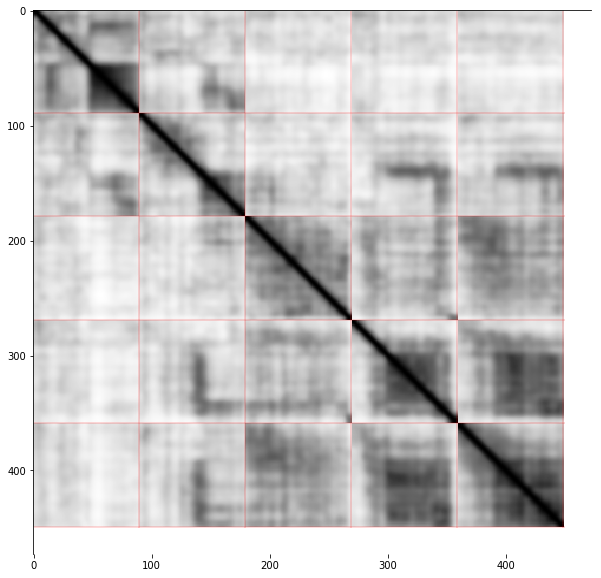

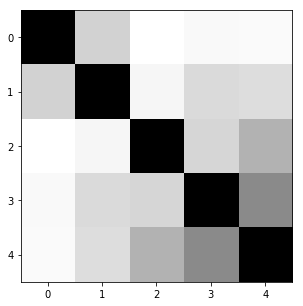

In [20]:
SM,U,(f_S,ax_SM),(f_U,ax_U)= sm.single_session(sess)